In [1]:
##########################################
# NACA 0012 DNS post-processing.         #
# Zhenyang Yuan                          #
# 25/5/2021                              #
##########################################
import numpy as np
from math import pi
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import scipy.signal
from numpy import linalg as LA
#from matplotlib.mlab import griddata
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline


from sys import argv

import pandas as pd

In [2]:
# load data set
def data_load_DNS(time,t,start,end,x_,y_,headline,varibles,numNodes,Lines):
    r = 5
    #x_ = np.asarray([])
    #y_ = np.asarray([])
    p_ = np.asarray([])

    x = np.asarray([])
    y = np.asarray([])
    p = np.asarray([])
    
    
        
    

    k = 0
    #for i in open("../send/"+str(time)+".dat").readlines():
    for i in open("/Users/yuanzhenyang/software/yuan_compute/aerofoil/postprocessing/walldatFiles/bnd_wall_"+str(time)+".dat").readlines():
        if k > headline - 1:                                #get away with headers
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float

            if t == 0:
                if k < Lines*1 + headline :
                        x_ = np.concatenate((x_,datContent),axis=None)
                elif k < Lines*2 + headline :
                        y_ = np.concatenate((y_,datContent),axis=None)
                elif k < Lines*9 + headline and k > Lines*8 + headline - 1:
                        p_ = np.concatenate((p_,datContent),axis=None)
            else:
                if k < Lines*9 + headline and k > Lines*8 + headline - 1:
                        p_ = np.concatenate((p_,datContent),axis=None)
            """if k < Lines*1 + headline :
                        x_ = np.concatenate((x_,datContent),axis=None)
            elif k < Lines*2 + headline :
                        y_ = np.concatenate((y_,datContent),axis=None)
            elif k < Lines*9 + headline and k > Lines*8 + headline - 1:
                        p_ = np.concatenate((p_,datContent),axis=None)"""


        k+=1
        if k > Lines*9 + headline:
            break

    for i in range(len(x_)):
        if abs(x_[i]) < r and abs(y_[i]) < r:
            if t == 0:
                x = np.concatenate((x,x_[i]),axis=None)
                y = np.concatenate((y,y_[i]),axis=None)
                p = np.concatenate((p,p_[i]),axis=None)
            else:
                p = np.concatenate((p,p_[i]),axis=None)

    print('Completed: '+str(time-start+1)+'/'+str(end-start+1)+'\n')

    if t == 0:
        return x,y,p,x_,y_
    elif time == end:
        print('Completed collecting data from Nektar++ DNS solution!')
        return p
    else:
        return p


In [3]:
start = 27    #27
end = 107      #67
time = np.arange(start,end+1,1)

headline=3
varibles=3   # x-1, y-2, rho-3, rhou-4, rhov-5, E-6, u-7, v-8, p-9, T, s, a, Mach, Sensor
numNodes=888
#Lines=int(numNodes/5) #from tecplot
Lines=int(numNodes/1000)+1 #fieldconvert


x_ = np.asarray([])   #pruely for loading speed reason
y_ = np.asarray([])

xwall,ywall,p1wall,x_,y_ = data_load_DNS(time[0],0,start,end,x_,y_,headline,varibles,numNodes,Lines)

pwall = np.zeros([len(time), len(p1wall)])
pwall[0] = p1wall
for i in range(len(time)):
    if i > 0:
        pwall[i][:]=data_load_DNS(time[i],1,start,end,x_,y_,headline,varibles,numNodes,Lines)


Completed: 1/81

Completed: 2/81

Completed: 3/81

Completed: 4/81

Completed: 5/81

Completed: 6/81

Completed: 7/81

Completed: 8/81

Completed: 9/81

Completed: 10/81

Completed: 11/81

Completed: 12/81

Completed: 13/81

Completed: 14/81

Completed: 15/81

Completed: 16/81

Completed: 17/81

Completed: 18/81

Completed: 19/81

Completed: 20/81

Completed: 21/81

Completed: 22/81

Completed: 23/81

Completed: 24/81

Completed: 25/81

Completed: 26/81

Completed: 27/81

Completed: 28/81

Completed: 29/81

Completed: 30/81

Completed: 31/81

Completed: 32/81

Completed: 33/81

Completed: 34/81

Completed: 35/81

Completed: 36/81

Completed: 37/81

Completed: 38/81

Completed: 39/81

Completed: 40/81

Completed: 41/81

Completed: 42/81

Completed: 43/81

Completed: 44/81

Completed: 45/81

Completed: 46/81

Completed: 47/81

Completed: 48/81

Completed: 49/81

Completed: 50/81

Completed: 51/81

Completed: 52/81

Completed: 53/81

Completed: 54/81

Completed: 55/81

Completed: 56/81

C

In [4]:
## load data from Alex's simulation
def data_load_Alex():


    x_cp = np.asarray([])
    y_cp = np.asarray([])
    cp = np.asarray([])
    
    x_cf = np.asarray([])
    cf = np.asarray([])
    
    x_cp_xfoil = np.asarray([])
    y_cp_xfoil = np.asarray([])
    cp_xfoil = np.asarray([])
    
    

    #for i in open("../send/"+str(time)+".dat").readlines():
    for i in open("/Users/yuanzhenyang/software/yuan_compute/aerofoil/postprocessing/datFromAlex/data_cp.dat").readlines():
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float

            
            x_cp = np.concatenate((x_cp,datContent[0]),axis=None)
            y_cp = np.concatenate((y_cp,datContent[1]),axis=None)
            cp = np.concatenate((cp,datContent[2]),axis=None)
            
    for i in open("/Users/yuanzhenyang/software/yuan_compute/aerofoil/postprocessing/datFromAlex/data_cp.dat").readlines():
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float

            
            x_cf = np.concatenate((x_cf,datContent[0]),axis=None)
            cf = np.concatenate((cf,datContent[2]),axis=None)
            
    k = 0        
    for i in open("/Users/yuanzhenyang/software/yuan_compute/aerofoil/postprocessing/datFromAlex/main_02_xfoil_cpv.dat").readlines():
            
            if k != 0:
                datContent = i.strip().split()                  #magic

                datContent = np.asarray(datContent)             #convert list to array
                datContent = datContent.astype(np.float64)      #convert str element to float

            
                x_cp_xfoil = np.concatenate((x_cp,datContent[0]),axis=None)
                cp_xfoil = np.concatenate((cp,datContent[1]),axis=None)
            k += 1
                

    print('Completed: loading cp from Alex\n')

    
    return x_cp,y_cp,cp,x_cp_xfoil,cp_xfoil,x_cf,cf
    


In [5]:
x_cp_Alex,y_cp_Alex,cp_Alex,x_cp_xfoil,cp_xfoil,x_cf_Alex,cf_Alex = data_load_Alex()

Completed: loading cp from Alex



In [6]:
## calculate total, mean, fluctuation pressure values
def fluc_pressure(p,time):
    dp = np.zeros([len(time), len(p[0])])
    dptuda = np.zeros([len(time), len(p[0])])
    dpmean = np.zeros(len(p[0]))
    for i in range(len(time)):
        dp[i] = p[i] - 1/1.4*np.ones(len(p[0]))
        dpmean += dp[i]
    dpmean = dpmean/len(time)
    for i in range(len(time)):
        dptuda[i] = dp[i] - dpmean

    return dp,dpmean,dptuda

In [7]:
## calculate rms values of input time depended arrays
## root mean square
def rms(p,time):
    pms_ = np.zeros(p.shape[1])
    
    for i in range(len(time)):
        pms_ += p[i]**2
            
    pms = pms_/len(time)
    prms = np.sqrt(pms)
    
    return pms, prms


def findSmallestDx(x,y):
    a = 1
    b = 0
    for i in range(len(x)):
        if y[i] == 0:
            b = abs(x[i]) - 0.5
            if b < a and b != 0:
                a = b
                
    print('dr_smallest = '+str(a))
    return a


def polar_coor(x,y):
    theta =np.arctan2(y,-x)
    r = np.sqrt(x**2+y**2)
    return theta,r


def swap(p_coe,index):
    temp = np.zeros([p_coe.shape[0],p_coe.shape[1]])
    for i in range(p_coe.shape[0]):
        for j in range(p_coe.shape[1]):
            temp[i][j] = p_coe[i][j]
    for j in range(p_coe.shape[0]):
        for i in range(index.shape[0]):
            p_coe[j][i] = temp[j][index[i]]
    return p_coe


# degree in rad
def rotate(x,y,deg):
    xx = np.zeros(len(x))
    yy = np.zeros(len(y))
    
    xx = x*np.cos(deg) - y*np.sin(deg)
    yy = x*np.sin(deg) + y*np.cos(deg)
    return xx,yy

In [8]:
def aerfoiltool(xaero,yaero):
    ### build the NACA aerofoil
    ### refernce web page: http://airfoiltools.com/airfoil/naca4digit?MNaca4DigitForm%5Bcamber%5D=0&MNaca4DigitForm%5Bposition%5D=0&MNaca4DigitForm%5Bthick%5D=12&MNaca4DigitForm%5BnumPoints%5D=200&MNaca4DigitForm%5BcosSpace%5D=0&MNaca4DigitForm%5BcosSpace%5D=1&MNaca4DigitForm%5BcloseTe%5D=0&MNaca4DigitForm%5BcloseTe%5D=1&yt0=Plot
    ### this program is only valid for NACA 00XX aerofoils, note yc = 0 here
    

    ## The constants a0 to a4 are for a 20% thick airfoil. The expression T/0.2 adjusts the constants to the required thickness.
    a0 = 0.2969
    a1 = -0.126
    a2 = -0.3516
    a3 = 0.2843
    a4 = -0.1015

    T = 0.12  ## aerofoil NACA 0012
    
    


    #yt = T/0.2*(a0*xc**0.5+a1*xc+a2*xc**2+a3*xc**3+a4*xc**4)   #thickness respect to x
    
    k = np.zeros(len(xaero))
    theta = np.zeros(len(xaero))
    
    for i in range(len(xaero)):
        if xaero[i] < 0.98:
            if xaero[i] == 0.0:
                theta[i] = 0
            else:
                k[i] = T/0.2*(0.5*a0*xaero[i]**(-0.5)+a1+2*a2*xaero[i]+3*a3*xaero[i]**2+4*a4*xaero[i]**3)  ##slope of the aerofoil surface
                k_t = -1/k[i]
                if yaero[i] > 0 and k_t > 0:
                    
                    theta[i] = np.arctan(k_t) 
                    
                elif yaero[i] < 0 and k_t < 0:
                    theta[i] =  -np.arctan(k_t) - pi 
                    
                elif yaero[i] > 0 and k_t < 0:
                    theta[i] = np.arctan(k_t) + pi
                    
                elif yaero[i] < 0 and k_t > 0:
                    theta[i] = -np.arctan(k_t) 
                    #print(str(xaero[i])+','+str(yaero[i])+','+str(theta[i]*180/pi))
                
                else:
                    print(error)
        else:
            x_c = 0.98 - 0.004*0.98
            y_c = 0
            
            #theta[i] = yaero[i]/abs(yaero[i])*pi + np.arctan2(yaero[i] - y_c , xaero[i] - x_c)
            theta[i] = np.arctan2(yaero[i] - y_c , xaero[i] - x_c)
   
    
    return theta
            
    
    

In [9]:
def swap(p_coe,index):
    temp = np.zeros([p_coe.shape[0],p_coe.shape[1]])
    for i in range(p_coe.shape[0]):
        for j in range(p_coe.shape[1]):
            temp[i][j] = p_coe[i][j]
    pp_coe = np.zeros([p_coe.shape[0],p_coe.shape[1]])
    for j in range(p_coe.shape[0]):
        for i in range(index.shape[0]):
            pp_coe[j][i] = temp[j][index[i]]
    return pp_coe

In [10]:
def swap_1d(q,index):
    temp = np.zeros(q.shape[0])
    for i in range(q.shape[0]):
        temp[i] = q[i]
    qq = np.zeros(len(temp))
    for j in range(q.shape[0]):
        qq[j] = temp[index[j]]
    return qq

In [11]:
def cal_area(xaero,yaero):
    ## calculate dA
    
    
    a0 = 0.2969
    a1 = -0.126
    a2 = -0.3516
    a3 = 0.2843
    a4 = -0.1015
    
    xx = np.asarray([])
    yy = np.asarray([])
    
    
    xx = np.concatenate((xaero,xaero[0]),axis=None)
    yy = np.concatenate((yaero,yaero[0]),axis=None)
    dA_ = np.zeros(len(xx))
   
    for i in range(len(xx)-1):
        dA_[i] = np.sqrt((xx[i] - xx[i+1])**2+(yy[i] - yy[i+1])**2)
        """
        if xx[i] < 0.98:
            a1 = T/0.2*(a0*xx[i]**1.5/1.5+a1*xx[i]**2/2+a2*xx[i]**3/3+a3*xx[i]**4/4+a4*xx[i]**5/5)
            j = i + 1
            a2 = T/0.2*(a0*xx[j]**1.5/1.5+a1*xx[j]**2/2+a2*xx[j]**3/3+a3*xx[j]**4/4+a4*xx[j]**5/5)
            dA_[i] = abs(a2-a1)
        else:
            dA_[i] = np.sqrt((xx[i] - xx[i+1])**2+(yy[i] - yy[i+1])**2)"""
        
    
    
    dA = np.zeros(len(yaero))
    for j in range(1,len(yaero)):
        dA[j] = (dA_[j] + dA_[j-1])/2 
    return dA

In [12]:
# CL and CD

#Time-averaged pressure coefficient
def cal_cp_cl_cd(p,x,y,time):
    
    deg = pi/60
    T = 0.12
    
    xaero,yaero = rotate(x,y,deg)
    
    
    
    x_temp = np.zeros(len(xaero))
    for i in range(len(x_temp)):
        if y[i] != 0:
            x_temp[i] = xaero[i]*yaero[i]/abs(yaero[i])

    index1 = np.argsort(x_temp)
    xt = swap_1d(xaero,index1)
    yt = swap_1d(yaero,index1)
    
    
    
    theta = -aerfoiltool(xt,yt) - pi/60
    
    #theta = swap_1d(theta,index1)
    p_coe = swap(p,index1)
    
    dA = cal_area(xt,yt)

    ## calculate Cl Cd
    cd = np.zeros(len(time))
    cl = np.zeros(len(time))
    cp = np.zeros(p_coe.shape[1])
    for i in range(len(time)):
        temp1 = 0
        temp2 = 0
        for j in range(len(theta)):
            temp1 += (p_coe[i][j]-1/1.4)*np.sin(theta[j])*dA[j]
            temp2 += (p_coe[i][j]-1/1.4)*np.cos(theta[j])*dA[j]
        cp += p_coe[i] - 1/1.4
        cl[i] = temp1
        cd[i] = temp2

    cl = cl/(0.5*1*0.3**2)/np.sum(dA)
    cd = cd/(0.5*1*0.3**2)/np.sum(dA)
    cp = cp/len(time)/(0.5*1*0.3**2)
   
    print(np.sum(dA))
    return cd,cl,cp,xt,yt,theta

In [13]:
cd,cl,cp,xt,yt,theta = cal_cp_cl_cd(pwall,xwall,ywall,time)

2.0050076840142714


In [14]:
time_phsical = np.linspace(35,43,len(time))

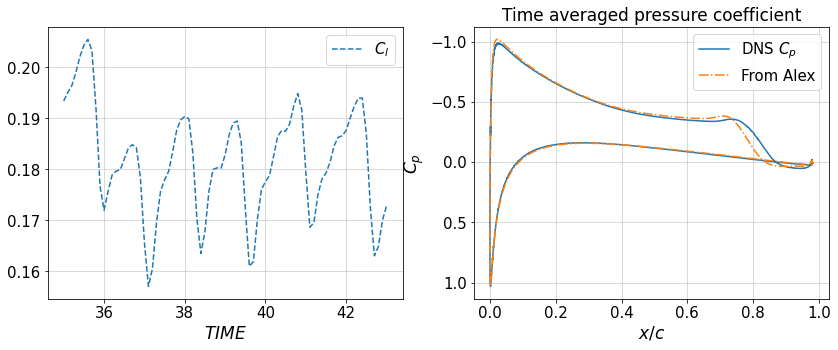

In [15]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
#ap = ax.plot(time_physical,cl,'--',label='$C_l$')

ap = ax.plot(time_phsical,cl,'--',label='$C_l$')
#ap = ax.plot(time_phisical,cd,'.',label='$C_d$')

#ap = ax.plot(cl,cd,'.')



ap = ax.legend(loc='best')
ap = plt.xlabel('$TIME$')

#plt.xlim([(time_nek[0]-238.5)*0.2,(time_nek[-1]-238.5)*0.2])

#ap = plt.ylabel('')
plt.grid()
ax = plt.subplot(1,2,2)
ap = ax.plot(xt,cp,'-',label='DNS $C_p$')
ap = ax.plot(x_cp_Alex,cp_Alex,'-.',label='From Alex')
#ap = ax.plot(x_cp_xfoil,cp_xfoil,'.',label='From Xfoil')

plt.gca().invert_yaxis()
ap = plt.xlabel('$x/c$')
ap = plt.ylabel('$C_p$')
ap = ax.legend(loc='best')
#plt.xlim([0,180])
#plt.xlim([50,60])
#plt.ylim([-1,-0.5])
plt.title('Time averaged pressure coefficient')
plt.grid()

#print((theta_t+pi)/pi*180)
#print(cp)
#print('cl amplitude = '+str(max(cl_nek)))
#print('cd amplitude = '+str((max(cd_nek)-min(cd_nek))/2))
#print('cd mean = '+str((max(cd_nek)+min(cd_nek))/2))

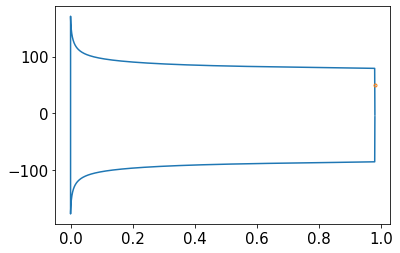

In [16]:
plt.plot(xt,theta*180/pi)
plt.plot(0.98,50,'.')

In [17]:
k = np.linspace(0,100,10)
k = k
b =  np.arctan(k) - pi
print(b*180/pi)

[-180.          -95.14276456  -92.57657183  -91.718358    -91.28893756
  -91.03121267  -90.85937224  -90.73661943  -90.64455033  -90.5729387 ]


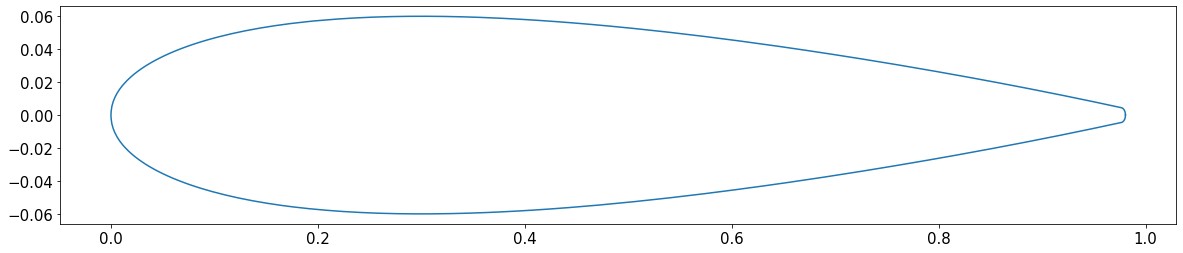

In [18]:
plt.figure(figsize=(20,4))
#plt.plot(xx,yy,'.')
plt.plot(xt,yt,'-')
#plt.xlim([-0.01,0.01])
#plt.ylim([-0.001,0.001])

## PSD

In [19]:
dp,dpmean,dptuda = fluc_pressure(pwall,time)

In [20]:
# varibles xwall,ywall,pwall
# select one point on the aerofoil to do the power spectrum
loc = int(len(xwall)/2)
print(str(xwall[loc])+','+str(ywall[loc]))
p_psd = np.asarray([])
for i in range(len(time)):
    p_psd = np.concatenate((p_psd,dptuda[i][loc]),axis = None)

0.979166,-0.0520355


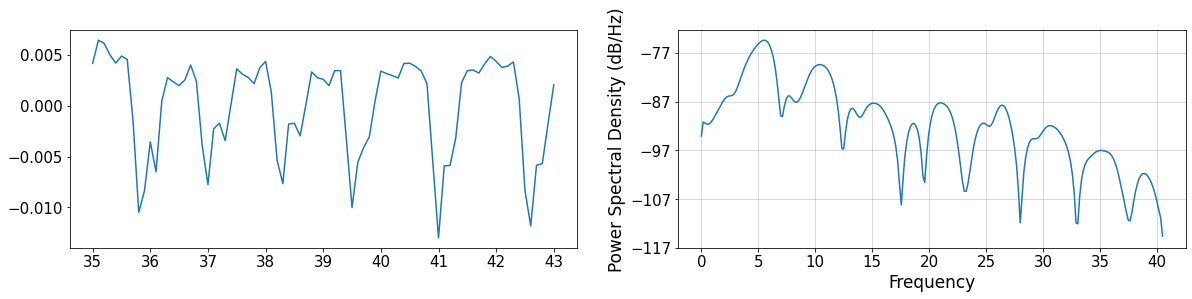

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

dt = 1/len(time_phsical)

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(20,4))
ax0.plot(time_phsical, p_psd)
ax1.psd(p_psd, 512, 1/dt)

plt.show()

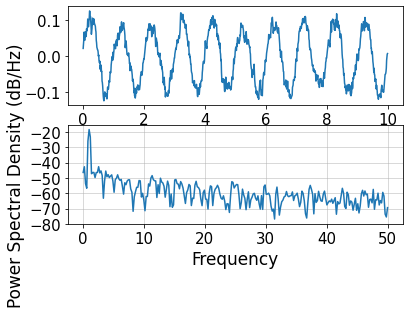

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
#np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(t, s)
ax1.psd(s, 512, 1 / dt)

plt.show()